<a href="https://colab.research.google.com/github/HHansi/Applied-AI-Course/blob/main/Image%20Processing/Image_Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import zipfile
with zipfile.ZipFile("/content/sample_images.zip", 'r') as zip_ref:
    zip_ref.extractall("/content/")

# Digital Image Representation

Computers use the representation of matrix composed of numeric values.

In [66]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Load Image

height, width, channels: (139, 85, 3)


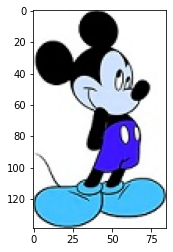

In [67]:
img = cv2.imread("/content/sample_images/mickey_mouse.jpg")

print(f'height, width, channels: {img.shape}')

plt.imshow(img)

## Save Image

In [68]:
cv2.imwrite("/content/sample_images/mickey_mouse2.jpg", img)

True

# Image Manipulation

## Gray Scaling

Coverting images to a range of monochromatic shades from black to white.

More details about <i>cvtColor</i> function is available with the [documentation]( https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#void%20cvtColor%28InputArray%20src,%20OutputArray%20dst,%20int%20code,%20int%20dstCn%29). 

True

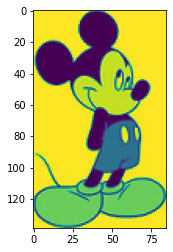

In [71]:
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_grayscaled)

cv2.imwrite("/content/sample_images/mickey_mouse-grayscaled.jpg", img_grayscaled)

## Resizing

Image resizing refers to either enlarging or shrinking images and it is mainly done using interpolation.

Commonly used interpolation algorithms are
- Nearest neighbour interpolation,
- Biliniear interpolation, and
- Bicubic interpolation. 

More details about <i>resize</i> function is avaialble [here](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d) including its default setting and supported interpolation methods. 

Let's enlarge the mickey mouse image with scale ratio of 2. 

In [72]:
scale_ratio = 2 

# define new dimensions
width = int(img.shape[1] * scale_ratio)
height = int(img.shape[0] * scale_ratio)
dim = (width, height)
print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (170, 278)


height, width, channels: (278, 170, 3)


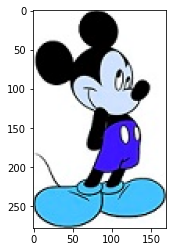

In [73]:
# resize using nearest neighbor interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_NEAREST)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(img_resized)

height, width, channels: (278, 170, 3)


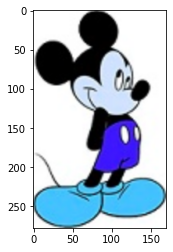

In [74]:
# resize using bilinear interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_LINEAR)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(img_resized)

height, width, channels: (278, 170, 3)


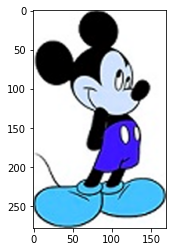

In [75]:
# resize using bicubic interpolation
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_CUBIC)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(img_resized)

Let's shrink the mickey mouse image with scale ratio of 2. 

As suggested in function [documentation](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html#ga47a974309e9102f5f08231edc7e7529d), to shrink an image, it will generally look best with INTER_AREA interpolation.

In [76]:
scale_ratio = 2 

# define new dimensions
width = int(img.shape[1] / scale_ratio)
height = int(img.shape[0] / scale_ratio)
dim = (width, height)
print(f'New dimensions(width, height): {dim}')

New dimensions(width, height): (42, 69)


height, width, channels: (69, 42, 3)


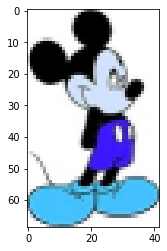

In [77]:
img_resized = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)

print(f'height, width, channels: {img_resized.shape}')

plt.imshow(img_resized)

## Blurring/ Smoothing

Image blurring is achieved by convolving the image with a low-pass filter kernel.

Commonly used techniques are
- Box filtering, and
- Gaussian filtering.

Refer this [tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html) for more details.

In [78]:
img = cv2.imread("/content/sample_images/white_box.jpg")

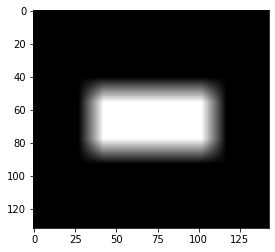

In [79]:
# image blurring using box filtering
img_blurred = cv2.blur(img, (15,15))

plt.imshow(img_blurred)

Additionally, <i>GaussianBlur</i> requires a sigma value as a parameter. 
More details about parameters can be found [here](https://www.tutorialkart.com/opencv/python/opencv-python-gaussian-image-smoothing/).

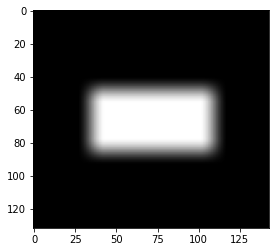

In [80]:
# image blurring using Gaussian filtering
img_blurred = cv2.GaussianBlur(img,(15,15), 5)
plt.imshow(img_blurred)

## Histogram Equalisation

Histogram equalisation is an image processing technique which spreads out the most frequent pixel intensity values or stretches the histogram to either ends, to enhance the image’s contrast.

Refer this [tutorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_histograms/py_histogram_equalization/py_histogram_equalization.html) for more details. 

In [81]:
img = cv2.imread("/content/sample_images/valley.jpg")

True

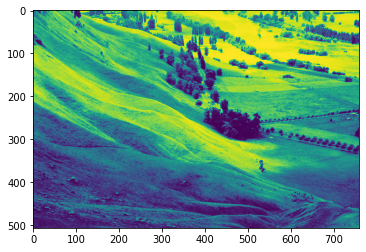

In [82]:
# image need to be grayscaled before input to equalizeHist
img_grayscaled = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_hist = cv2.equalizeHist(img_grayscaled)

plt.imshow(img_hist)

cv2.imwrite("/content/sample_images/valley-histequalised.jpg", img_hist)

## Flipping

A flip (mirror effect) is done by reversing the pixels horizontally or vertically.

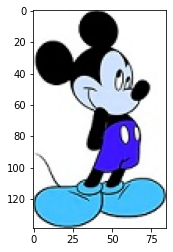

In [83]:
img = cv2.imread("/content/sample_images/mickey_mouse.jpg")

plt.imshow(img)

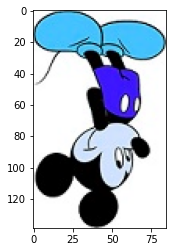

In [84]:
# Vertical flip
img_vflipped = cv2.flip(img, 0)

plt.imshow(img_vflipped)

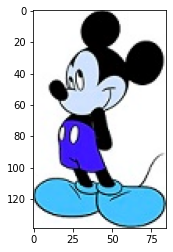

In [85]:
# Horizontal flip
img_hflipped = cv2.flip(img, 1)

plt.imshow(img_hflipped)

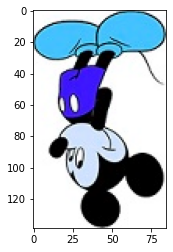

In [86]:
# Combined flip (vertical and horizontal)
img_flipped = cv2.flip(img, -1)

plt.imshow(img_flipped)

## Rotation

Image rotation is turning an image in a clockwise or counter clockwise direction.

Different rotatecodes supported by <i>rotate</i> function are as follows:
- cv2.ROTATE_90_CLOCKWISE
- cv2.ROTATE_90_COUNTERCLOCKWISE
- cv2.ROTATE_180

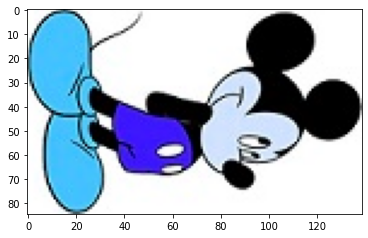

In [87]:
# Rotate 90 degree clockwise
img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

plt.imshow(img_rotated)

## Translation

Translation is moving the image along X, Y or both directions.

Refer this [turorial](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_geometric_transformations/py_geometric_transformations.html) for more detals. 

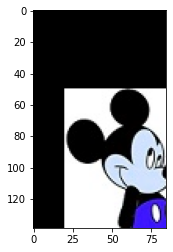

In [88]:
# Define the transformation matrix for shift (20,50)
m = np.float32([[1,0,20],[0,1,50]])

width = img.shape[1]
height = img.shape[0]
dim = (width, height)

img_translated = cv2.warpAffine(img, m, dim)

plt.imshow(img_translated)